<a href="https://colab.research.google.com/github/BBiwojno/POSI/blob/main/Cwiczenia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 5

## Wprowadzenie

### Regresja logistyczna

**Regresja logistyczna** to model statystyczny używany do przewidywania
prawdopodobieństwa zajścia zdarzenia (np. $ Y = 1 $) na podstawie jednej lub wielu
zmiennych objaśniających $$ X_1, X_2, \ldots, X_n $$

W przeciwieństwie do regresji liniowej, regresja logistyczna modeluje prawdopodobieństwo
w taki sposób, by zawsze mieściło się w przedziale $[0, 1]$.  

Używa do tego tzw. **funkcji logistycznej (sigmoidalnej)**, zdefiniowanej jako:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$

### Funkcja sigmoidalna

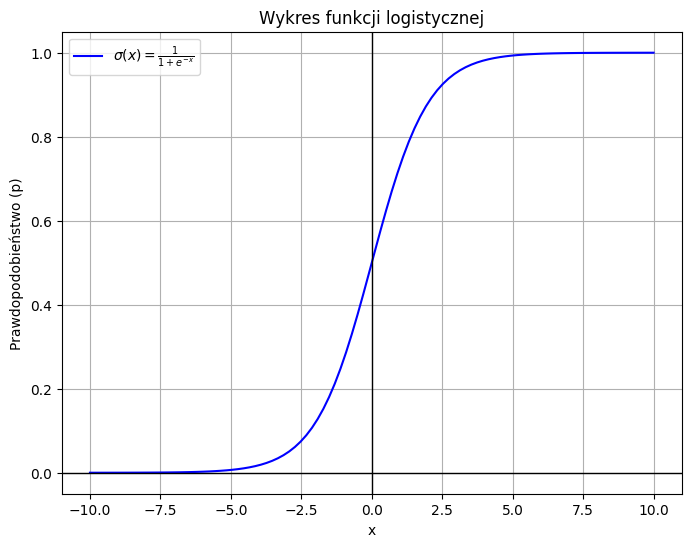

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji logistycznej
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Wartości x
x = np.linspace(-10, 10, 100)

# Obliczenie wartości funkcji logistycznej
y = sigmoid(x)

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Wykres funkcji logistycznej')
plt.xlabel('x')
plt.ylabel('Prawdopodobieństwo (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Przykład obliczenia regresji logistycznej

Załóżmy, że chcemy przewidzieć prawdopodobieństwo, że klient kupi produkt ($Y = 1$),
na podstawie liczby obejrzanych stron ($X$).

Model regresji logistycznej ma postać:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Niech parametry modelu wynoszą:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Obliczmy prawdopodobieństwo zakupu, gdy klient obejrzał $X = 5$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Czyli model przewiduje, że **prawdopodobieństwo zakupu wynosi 50%**.

<br>

### 2. Dla $X = 8$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

Oznacza to, że klient, który obejrzał 8 stron, ma około **91.6% szans na zakup**.

<br>

### 3. Dla $X = 2$ stron:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 2)}} = \frac{1}{1 + e^{2.4}} \approx 0.083
$$

Zatem przy tylko 2 obejrzanych stronach, prawdopodobieństwo zakupu wynosi **8.3%**.

<br>

Widzimy, że wraz ze wzrostem liczby stron ($X$), funkcja logistyczna zwiększa
prawdopodobieństwo zakupu w sposób **nieliniowy**, ale zawsze utrzymuje wynik w zakresie $[0, 1]$.


### Różnica między regresją liniową a logistyczną

**1. Regresja liniowa**  

- Służy do przewidywania **wartości ciągłych**.  
- Model przyjmuje postać:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- Wynik $y$ może przyjmować dowolną wartość rzeczywistą.  

**2. Regresja logistyczna**  

- Służy do przewidywania **prawdopodobieństwa zdarzenia**, najczęściej klasyfikacji binarnej.  
- Model przyjmuje postać:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- Wynik $p$ zawsze mieści się w przedziale $[0,1]$.  

<br><br>

**Podsumowanie w skrócie**:

| Cecha                | Regresja liniowa         | Regresja logistyczna     |
|----------------------|------------------------|-------------------------|
| Typ zmiennej zależnej | Ciągła                 | Binarny (0/1)           |
| Wynik modelu         | Dowolna liczba rzeczywista | Prawdopodobieństwo [0,1] |
| Funkcja aktywacji    | Brak / liniowa         | Sigmoid                 |


### Przykład regresji logistycznej w kodzie Python

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


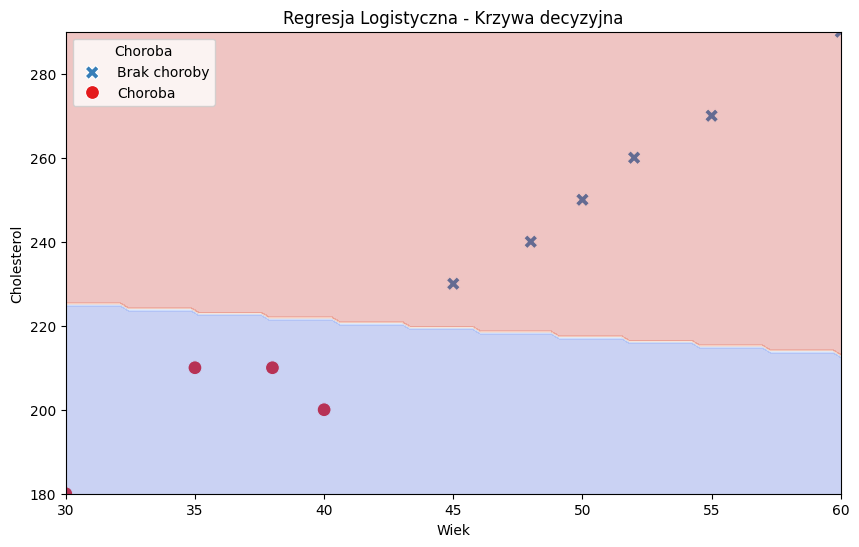

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Tworzymy przykładowe dane
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Podzielmy dane na zmienne niezależne (X) i zależną (y)
X = df[['Age', 'Cholesterol']]  # Zmienne niezależne
y = df['Has_Disease']  # Zmienna zależna

# Dzielimy dane na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidujemy wyniki na zbiorze testowym
y_pred = model.predict(X_test)

# Wizualizacja
plt.figure(figsize=(10, 6))

# Wykres rozkładu danych z oznaczeniem choroby
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Wygenerowanie wartości predykcji na podstawie modelu
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykres krzywej decyzyjnej regresji logistycznej
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Regresja Logistyczna - Krzywa decyzyjna")
plt.xlabel('Wiek')
plt.ylabel('Cholesterol')
plt.legend(title='Choroba', loc='upper left', labels=["Brak choroby", "Choroba"])
plt.show()

### Metryki oceny jakości modeli w zadaniach klasyfikacyjnych

# 1. Dokładność (Accuracy)

Dokładność mierzy, jaki odsetek przewidywań modelu jest poprawny. Jeśli mamy:

- \(TP\) – prawdziwie pozytywne (True Positive)  
- \(TN\) – prawdziwie negatywne (True Negative)  
- \(FP\) – fałszywie pozytywne (False Positive)  
- \(FN\) – fałszywie negatywne (False Negative)  

to dokładność definiuje się jako:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precyzja (Precision)

Precyzja mówi, jaki odsetek obserwacji przewidzianych jako pozytywne faktycznie jest pozytywnych:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Czułość (Recall / Sensitivity)

Czasem warto też policzyć czułość, czyli zdolność modelu do wykrywania prawdziwych pozytywów:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

F1-score to miara łącząca precyzję i czułość w jedną wartość. Jest to **harmoniczna średnia** precyzji i czułości, która uwzględnia zarówno błędy fałszywie pozytywne, jak i fałszywie negatywne.  

Definicja:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

gdzie:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score jest szczególnie przydatny, gdy klasy są niezbalansowane, ponieważ uwzględnia zarówno precyzję, jak i czułość.

<br><br>

| Miara | Definicja | Wzór |
|-------|-----------|------|
| **Dokładność (Accuracy)** | Odsetek poprawnie sklasyfikowanych przypadków | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precyzja (Precision)** | Odsetek prawdziwych pozytywów spośród przewidzianych jako pozytywne | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Czułość (Recall / Sensitivity)** | Odsetek prawdziwych pozytywów wykrytych przez model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specyficzność (Specificity)** | Odsetek prawdziwych negatywów wykrytych przez model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | Harmoniczna średnia precyzji i czułości | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |



### Przykład wykorzystania metryk dla regresji logistycznej w kodzie Python

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # losowe 0 lub 1
}

# Tworzymy DataFrame
df = pd.DataFrame(data)

# Podzielmy dane na zmienne niezależne (X) i zależną (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Dzielimy dane na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy i trenujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# Przewidujemy wyniki na zbiorze testowym
y_pred = model.predict(X_test)

# Sprawdzamy dokładność modelu
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f'Dokładność modelu: {accuracy * 100:.2f}%')
print(f'Precyzja: {precision * 100:.2f}%')
print(f'Czułość: {recall * 100:.2f}%')
print(f'f1-score: {f1 * 100:.2f}%')


Dokładność modelu: 75.00%
Precyzja: 70.59%
Czułość: 100.00%
f1-score: 82.76%


## Zadanie
Dla zbioru danych `heart_disease_uci.csv` przeprować analizę DEA oraz regresję logistyczną dla cechy `num`.

### Opis kolumn

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Pamiętaj o:
- sprawdzeniu, czy są brakujące dane,
- sprawdzeniu czy jest korelacja między cechami,
- wartościach odstających,
- sprawdzeniu poprawności modulu za pomocą metryk,
- wizualizacji danych oraz wyników.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, RocCurveDisplay


df = pd.read_csv("heart_disease_uci.csv")


df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:

df.info()


print("\nMissing values per column:")
print(df.isnull().sum())


df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol 

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [10]:

df = df.dropna()


df.reset_index(drop=True, inplace=True)

print(f"Po czyszczeniu mamy {df.shape[0]} obserwacji.")

Po czyszczeniu mamy 299 obserwacji.


In [11]:

label_encoder = LabelEncoder()
categorical_cols = ["sex", "cp", "restecg", "slope", "thal"]

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)


df['target'] = (df['num'] > 0).astype(int)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,1,Cleveland,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0,0
1,2,67,1,Cleveland,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2,1
2,3,67,1,Cleveland,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1,1
3,4,37,1,Cleveland,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0,0
4,5,41,0,Cleveland,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0,0


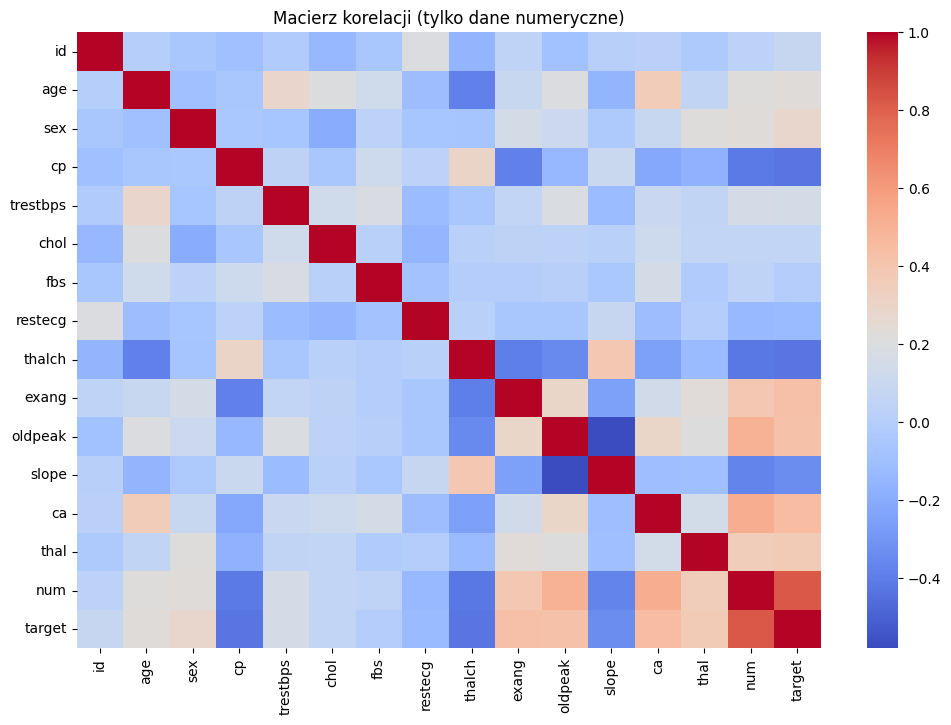

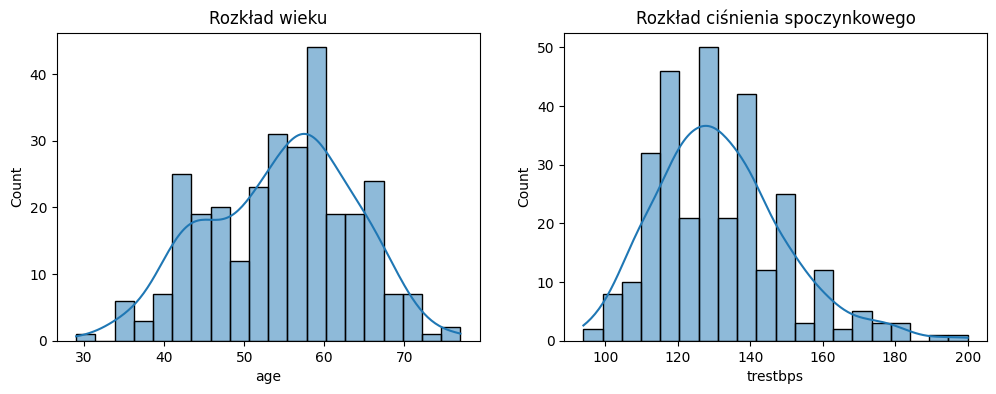

In [13]:
# Korelacje (tylko dane numeryczne)
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Macierz korelacji (tylko dane numeryczne)")
plt.show()

# Rozkład wieku i ciśnienia
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['age'], bins=20, kde=True, ax=axs[0])
sns.histplot(df['trestbps'], bins=20, kde=True, ax=axs[1])
axs[0].set_title("Rozkład wieku")
axs[1].set_title("Rozkład ciśnienia spoczynkowego")
plt.show()

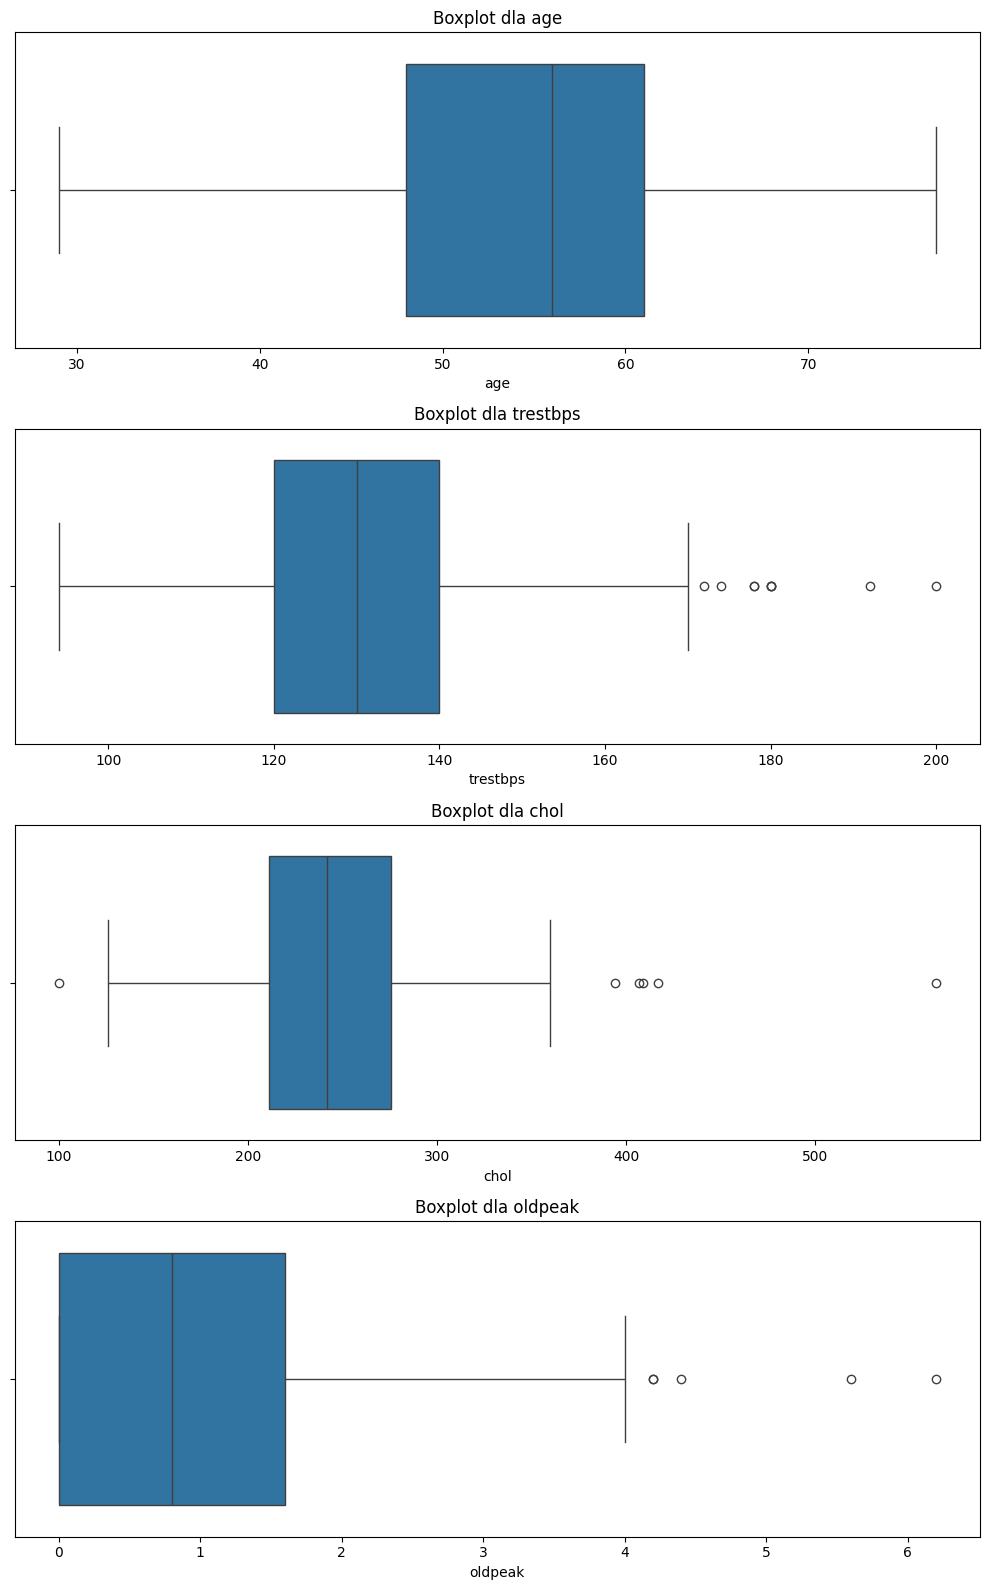

In [17]:

num_cols = ['age', 'trestbps', 'chol', 'oldpeak']

available_cols = [col for col in num_cols if col in df.columns]
missing_cols = [col for col in num_cols if col not in df.columns]


fig, axs = plt.subplots(len(available_cols), 1, figsize=(10, 4*len(available_cols)))
for i, col in enumerate(available_cols):
    sns.boxplot(x=df[col], ax=axs[i] if len(available_cols) > 1 else axs)
    axs[i].set_title(f"Boxplot dla {col}")
plt.tight_layout()
plt.show()

count    299.000000
mean       0.554718
std        0.286549
min        0.000000
25%        0.359937
50%        0.510084
75%        0.688565
max        1.955031
Name: DEA_efficiency, dtype: float64


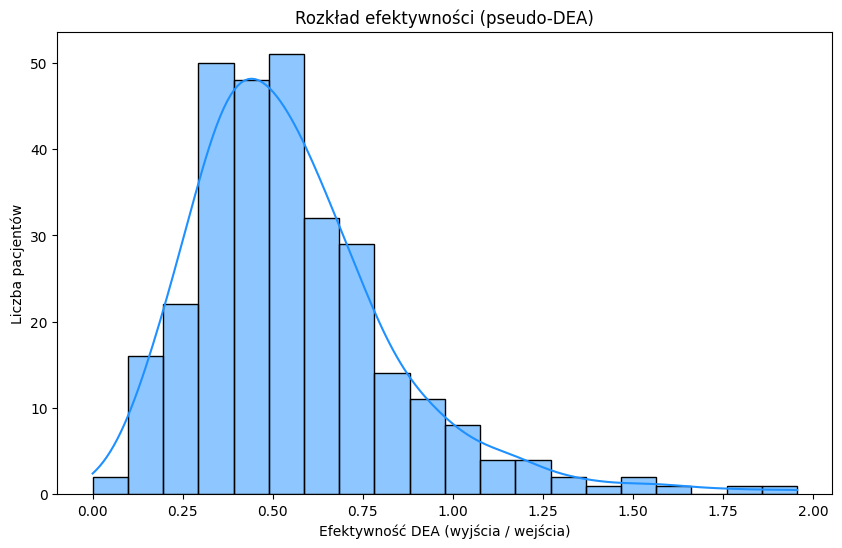

In [21]:

inputs = ['age', 'trestbps', 'chol']
outputs = ['thalch']


for col in inputs + outputs:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


df['DEA_efficiency'] = df[outputs].sum(axis=1) / df[inputs].sum(axis=1)


print(df['DEA_efficiency'].describe())


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['DEA_efficiency'], bins=20, kde=True, color='dodgerblue')
plt.title("Rozkład efektywności (pseudo-DEA)")
plt.xlabel("Efektywność DEA (wyjścia / wejścia)")
plt.ylabel("Liczba pacjentów")
plt.show()

Accuracy: 0.8555555555555555
ROC AUC: 0.9315476190476191

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        48
           1       0.87      0.81      0.84        42

    accuracy                           0.86        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



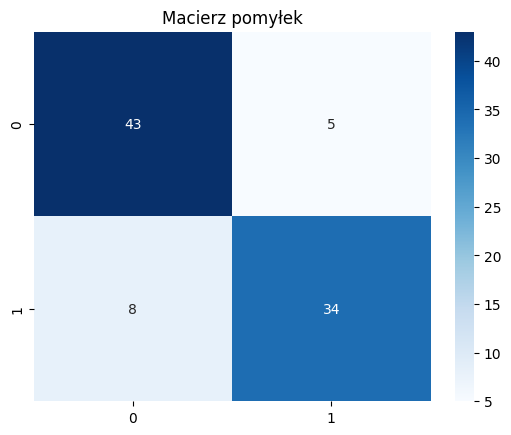

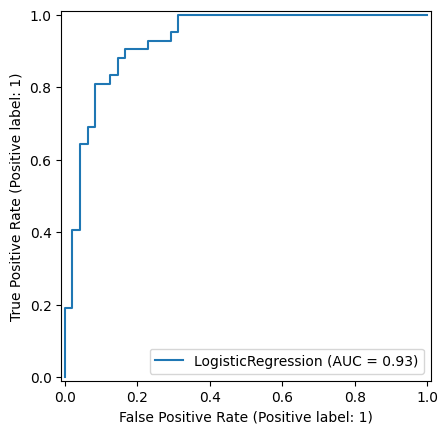

In [23]:

X = df.drop(columns=['id', 'dataset', 'num', 'target', 'DEA_efficiency'])
y = df['target']

# Skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Podział uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predykcje
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Metryki
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Macierz pomyłek
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Macierz pomyłek")
plt.show()

#ROC
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

/tmp/ipython-input-1982256728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x="Importance", y="Feature", palette="viridis")


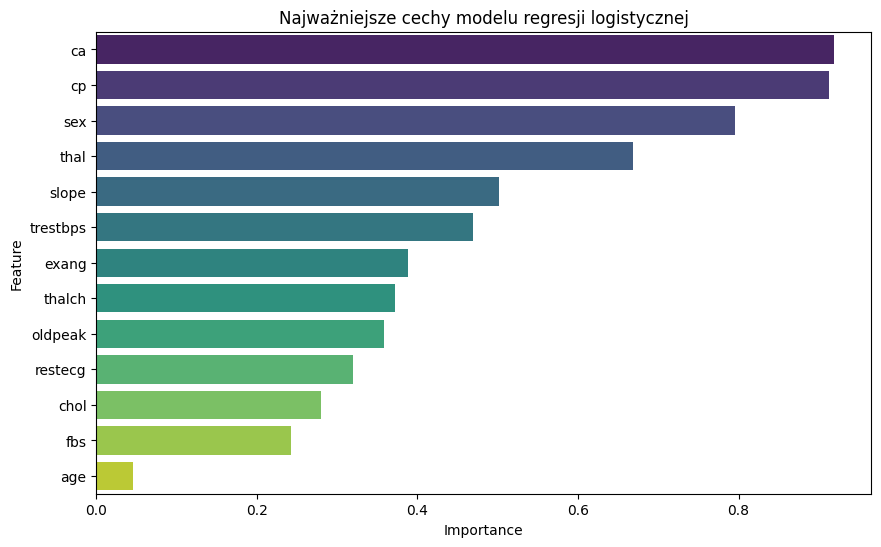

In [24]:
feature_importance = pd.DataFrame({
    'Feature': df.drop(['id', 'dataset', 'num', 'target', 'DEA_efficiency'], axis=1).columns,
    'Importance': abs(log_reg.coef_[0])
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Najważniejsze cechy modelu regresji logistycznej")
plt.show()